# Research Progress Meeting 2020-04-xx

![Keystone spill 2019](../resources/belle_fourche_1.jpg)

Image: Belle Fourche pipeline leak on Dec 05, 2016. https://bismarcktribune.com/news/state-and-regional/oil-spill-in-creek-originally-underestimated-making-it-one-of/article_93c58fa0-3d22-554c-a1ae-cfb08b248aee.html

### Purpose

1. Turn the data on its head - look at the incidents
2. Look at injuries and fatalities

### Questions

1. Top 10 incidens
2. How many incidents do we need to care about?
3. How do the largest incidents fare in terms of net loss and vice versa?
    * Do we need to look at spill volume, net loss, or both?
4. What are the largest incidents by decade?
5. Who are the operators?
6. What are the (stated) causes of these incidents?
7. Where are these incidents located?

### Side note

I think the volume of oil transported does not matter. What matters is how long a company operates one pipeline in one area. Whether during that time the pipeline has a high or low utilization rate should not matter (except sometimes when changing between commodities, or when changes occur for other reasons, that might be a source of accidents). Another issue is that higher volume may not be a result of more activity, but rather an indicator of a higher pipe diameter. By the way, more pipeline miles is a good indicator of activity, too, because when a pipeline is temporarily taken of the grid (e.g., for modification work or because a well has fallen dry) the operator may decide not to operate the pipeline in that year and hence not include this pipeline in its report to PHMSA.

## Setup

In [1]:
library(oildata)
library(tidyverse)
library(gridExtra)
library(glue)

packageVersion("oildata")

── Attaching packages ─────────────── tidyverse 1.3.0 ──

✓ ggplot2 3.3.0     ✓ purrr   0.3.3
✓ tibble  3.0.0     ✓ dplyr   0.8.5
✓ tidyr   1.0.2     ✓ stringr 1.4.0
✓ readr   1.3.1     ✓ forcats 0.5.0

── Conflicts ────────────────── tidyverse_conflicts() ──
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘glue’


The following object is masked from ‘package:dplyr’:

    collapse




[1] ‘1.1.8’

In [2]:
incidents <- subset(incidents, commodity %in% c("hvl", "rpp", "crude"))

glimpse(incidents)

Rows: 9,649
Columns: 29
$ DATAFILE_AS_OF      <dttm> 2020-03-31 04:52:07, 2020-03-31 04:52:07, 2020-0…
$ significant         <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, T…
$ serious             <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, …
$ incident_ID         <dbl> 19860003, 19860027, 19860028, 19860029, 19860030,…
$ ID                  <dbl> 22907, 12628, 12628, 18273, 18273, 18718, 15490, …
$ name                <chr> "Wyco Pipe Line", "Mobil Pipeline", "Mobil Pipeli…
$ state               <chr> "CO", "TX", "TX", "TX", "TX", "NJ", "TX", "KS", "…
$ on_offshore         <chr> "onshore", "onshore", "onshore", "onshore", "onsh…
$ installation_year   <dbl> 1966, 1963, 1926, 1939, 1955, 1956, 1930, 1958, 1…
$ CAUSE               <chr> "OUTSIDE FORCE DAMAGE", "CORROSION", "OUTSIDE FOR…
$ cause               <chr> "excavation damage", "corrosion", "excavation dam…
$ MAP_SUBCAUSE        <chr> "THIRD PARTY EXCAVATION DAMAGE", "INTERNAL", "THI…
$ fatalities          <dbl> 

## Top 10 incidents

There are five relevant metrics for identifying relevant spills:
1. Volume of commodity spilled
2. Net loss of commodity
3. Damage in USD
4. Number of injuries
5. Number of fatalities

I will proceed in three steps:
1. Identify the top 10 spills for each metric individually
2. Look at the overlap between them
3. Take a qualitative look at the spills (location, circumstances, causes etc.)

### By spill volume

In [3]:
irrelevant_cols <- quo(-c(narrative, DATAFILE_AS_OF, CAUSE, cost, recovered))

incidents %>%
    top_n(10, volume) %>%
    select(!! irrelevant_cols)

significant,serious,incident_ID,ID,name,state,on_offshore,installation_year,cause,MAP_SUBCAUSE,⋯,commodity,volume,fire,explosion,net_loss,year,date,long,lat,water_contamination
<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<chr>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>,<date>,<chr>,<chr>,<chr>
TRUE,TRUE,19860159,15490,Phillips Pipe Line,IN,onshore,1939,all other causes,MISCELLANEOUS,⋯,rpp,55000,FALSE,FALSE,NA,1986,1986-09-03,NA,NA,NA
TRUE,FALSE,19870101,12452,Mid - America Pipeline Co (Mapco),IA,onshore,1967,all other causes,MISCELLANEOUS,⋯,hvl,122000,TRUE,FALSE,122000,1987,1987-04-03,NA,NA,NA
TRUE,FALSE,19890091,11169,Lakehead Pipe Line,ND,onshore,1965,material/weld/equip failure,UNSPECIFIED PIPE BODY OR SEAM,⋯,crude,31300,FALSE,FALSE,22300,1989,1989-07-12,NA,NA,NA
TRUE,FALSE,19910057,11169,Lakehead Pipe Line,MN,onshore,1967,all other causes,MISCELLANEOUS,⋯,crude,40500,FALSE,FALSE,700,1991,1991-03-02,NA,NA,NA
TRUE,FALSE,19980095,18214,The Shamrock Pipe Line,TX,onshore,1979,all other causes,MISCELLANEOUS,⋯,crude,32903,FALSE,FALSE,297,1998,1998-05-13,NA,NA,NA
TRUE,FALSE,20020383,2731,Chevron Pipeline,TX,onshore,1966,corrosion,EXTERNAL,⋯,hvl,33010,TRUE,TRUE,33010,2002,2002-10-23,NA,NA,NO
TRUE,FALSE,20060071,31476,Semcrude,OK,onshore,1930,corrosion,INTERNAL,⋯,crude,49000,FALSE,FALSE,100,2006,2006-02-19,31.59494,58.68900,NO
TRUE,FALSE,20080020,31684,Conocophillips,TX,onshore,1948,material/weld/equip failure,PIPE SEAM,⋯,crude,31322,FALSE,FALSE,30991,2008,2008-01-06,W102'57211,N3303001,NO
TRUE,FALSE,20150071,31618,Enterprise Products Operating,WV,onshore,2013,material/weld/equip failure,"CONSTRUCTION, INSTALLATION OR FABRICATION-RELATED",⋯,hvl,30565,TRUE,TRUE,30565,2015,2015-01-26,-80.584594,40.366817,NO


In [4]:
top_volume <- incidents %>%
    top_n(10, volume) %>%
    arrange(desc(volume)) %>%
    mutate(n = 1:n()) %>%
    ggplot(aes(n, volume)) + 
        geom_col(color = "black", fill = "tan") +
        geom_text(aes(label = paste(name, "-", year)), angle = 90, 
                  hjust = c(1, rep(0, 9)), nudge_y = c(-1000, rep(1000, 9))) +
        scale_x_continuous(breaks = 1:10) +
        labs(x = NULL, y = "Volume spilled (in barrels)")

options(repr.plot.width=8, repr.plot.height=6)

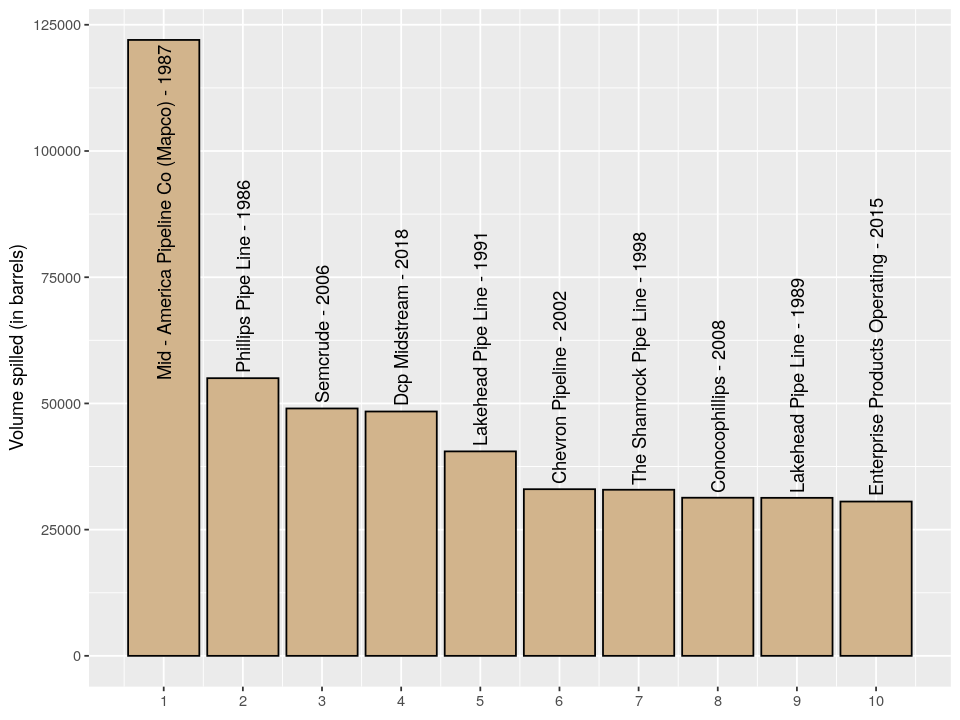

In [5]:
top_volume

### Other metrics

In [6]:
incidents$name_short <- substr(incidents$name, 1, 15)
incidents$year_short <- substr(incidents$year, 3, 4)

top_net_loss <- incidents %>%
    top_n(10, net_loss) %>%
    arrange(desc(net_loss)) %>%
    mutate(n = 1:n()) %>%
    ggplot(aes(n, net_loss)) + 
        geom_col(color = "black", fill = "tan") +
        geom_text(aes(label = paste0(name_short, " '", year_short)), angle = 90, 
                  hjust = c(1, rep(0, 9)), nudge_y = c(-1000, rep(1000, 9))) +
        labs(x = NULL, y = "Net loss (in barrels)") +
        theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank())

top_cost <- incidents %>%
    top_n(10, cost) %>%
    arrange(desc(cost)) %>%
    mutate(n = 1:n()) %>%
    ggplot(aes(n, cost)) + 
        geom_col(color = "black", fill = "tan") +
        geom_text(aes(label = paste(name_short, " '", year_short)), angle = 90, 
                  hjust = c(1, rep(0, 9)), nudge_y = c(-10000000, rep(10000000, 9))) +
        labs(x = NULL, y = "Cost (in 1984 USD)") +
        theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank())

top_injuries <- incidents %>%
    top_n(10, injuries) %>%
    arrange(desc(injuries)) %>%
    mutate(n = 1:n()) %>%
    ggplot(aes(n, injuries)) + 
        geom_col(color = "black", fill = "tan") +
        geom_text(aes(label = paste(name_short, "'", year_short)), angle = 90, 
                  hjust = c(1, 1, rep(0, 8)), nudge_y = c(-0.05, -0.05, rep(0.05, 8))) +
        labs(x = NULL, y = "Number of injuries") +
        scale_y_log10() +
        theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank())

top_fatalities <- incidents %>%
    top_n(10, fatalities) %>%
    arrange(desc(fatalities)) %>%
    mutate(n = 1:n()) %>%
    top_n(10, n) %>%
    ggplot(aes(n, fatalities)) + 
        geom_col(color = "black", fill = "tan") +
        geom_text(aes(label = paste(name_short, "'", year_short)), angle = 90, 
                  hjust = c(1), nudge_y = c(-0.05)) +
        labs(x = NULL, y = "Number of fatalities") +
        theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank())

top_grid <- arrangeGrob(top_net_loss, top_cost, top_injuries, top_fatalities, ncol=2)

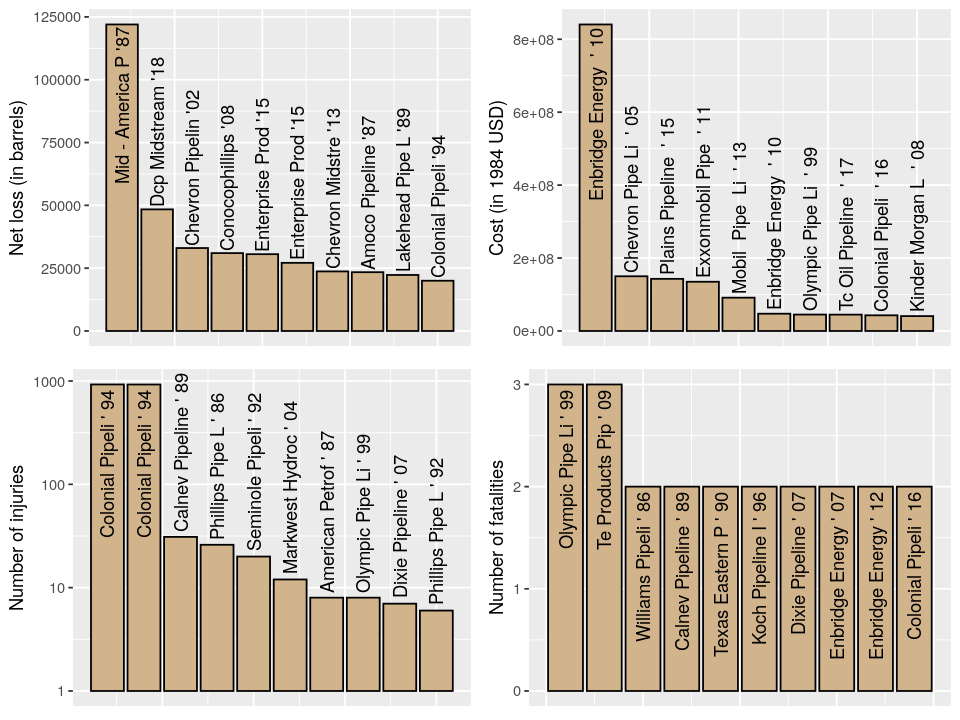

In [7]:
grid::grid.draw(top_grid)

## Incident profiles

In [8]:
incidents$name_short <- substr(incidents$name, 1, 23)
incidents$year_short <- substr(incidents$year, 3, 4)

top_10 <- top_n(incidents, 3, volume) %>%
    bind_rows(top_n(incidents, 3, net_loss)) %>%
    bind_rows(top_n(incidents, 3, cost)) %>%
    bind_rows(top_n(incidents, 3, injuries)) %>%
    bind_rows(top_n(incidents, 3, fatalities)) %>%
    unique()

top_10$log_injuries <- log(top_10$injuries + 1)
top_10$log_cost <- log(top_10$cost + 1)

top_10$nickname <- paste0(top_10$name_short, " '", top_10$year_short)
top_10$nickname <- ifelse(duplicated(top_10$nickname), paste0(top_10$nickname, "b"), top_10$nickname)

relevant_cols <- quos(c(nickname, incident_ID, volume, net_loss, log_cost, log_injuries, fatalities))

In [9]:
top_10_scaled <- top_10 %>%
    select(!!! relevant_cols) %>%
    mutate_at(vars(volume, net_loss, log_cost, log_injuries, fatalities), scales::rescale)
head(top_10_scaled)

nickname,incident_ID,volume,net_loss,log_cost,log_injuries,fatalities
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Phillips Pipe Line '86,19860159,0.4508197,NA,0.6385723,0.482415,0
Mid - America Pipeline '87,19870101,1.0000000,1.0000000000,0.0000000,0.000000,0
Semcrude '06,20060071,0.4016393,0.0008196721,0.6553268,0.000000,0
Chevron Pipeline '02,20020383,0.2705738,0.2705737705,0.6442606,0.000000,0
Dcp Midstream '18,20180382,0.3967213,0.3967213115,0.8047288,0.160805,0
Chevron Pipe Line Compa '05,20050287,0.1935574,0.0000000000,0.9161347,0.000000,0


In [10]:
incident_profiles <- top_10_scaled %>%
    pivot_longer(-c(nickname, incident_ID)) %>%
    ggplot(aes(x = name, y = value)) +
        geom_col() +
        facet_wrap(~ nickname) +
        coord_flip() + 
        labs(y = NULL, x = NULL)

# incident_profiles_1 <- top_10_scaled %>%
#     slice(1:round(n()/2)) %>%
#     pivot_longer(-nickname) %>%
#     ggplot(aes(x = name, y = value)) +
#         geom_col() +
#         facet_wrap(~ nickname) +
#         coord_flip()

# incident_profiles_2 <- top_10_scaled %>%
#     slice((round(n()/2) + 1): n()) %>%
#     pivot_longer(-nickname) %>%
#     ggplot(aes(x = name, y = value)) +
#         geom_col() +
#         facet_wrap(~ nickname) +
#         coord_flip()

Warning message:
“Removed 3 rows containing missing values (position_stack).”


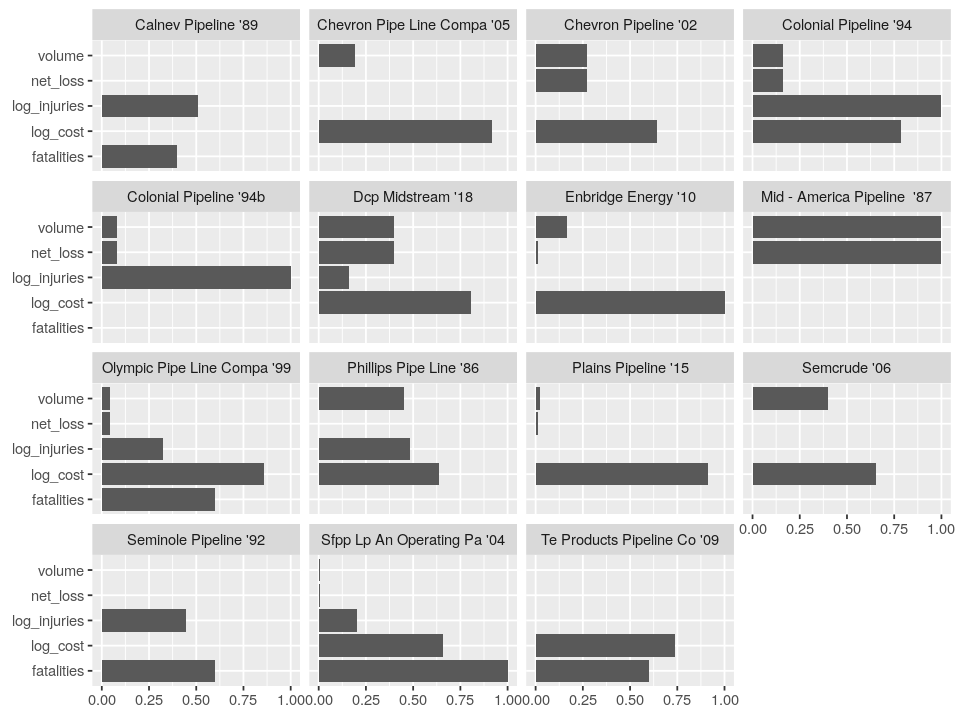

In [11]:
incident_profiles

### Get incident IDs

In [12]:
incident_profiles_ID <- top_10_scaled %>%
    pivot_longer(-c(nickname, incident_ID)) %>%
    ggplot(aes(x = name, y = value)) +
        geom_col() +
        facet_wrap(incident_ID ~ nickname) +
        coord_flip() + 
        labs(y = NULL, x = NULL)

Warning message:
“Removed 3 rows containing missing values (position_stack).”


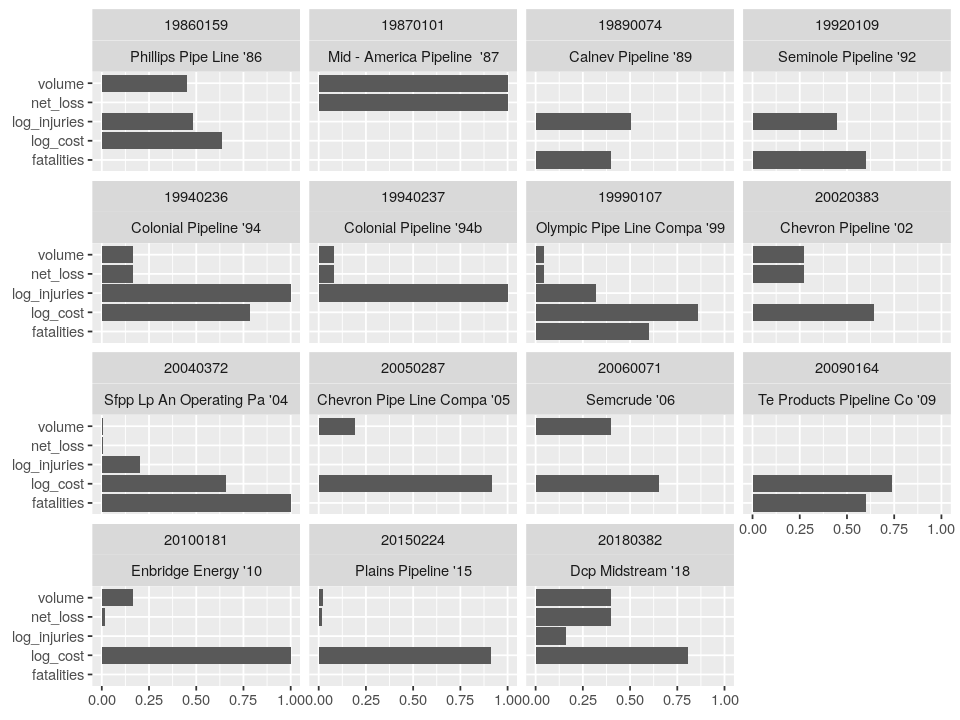

In [13]:
incident_profiles_ID

In [26]:
print_inc <- function(inc) {
    info <- glue("
General information

Company name:  {inc$name}
Commodity:     {inc$commodity}
Date:          {inc$date}
Lat/Long:      {inc$long}/{inc$lat}
State:         {inc$state}


Outcomes

Spill volume:    {inc$volume}
Recovered:       {inc$recovered}
Net loss:        {inc$net_loss}
Cost (USD 1984): {sprintf('%d', inc$cost)}
Injuries:        {inc$injuries}
Fatalities:      {inc$fatalities}


Causes

Cause (self_selected):     {inc$CAUSE}
Cause (coded by PHMSA):    {inc$cause}
Subcause (coded by PHMSA): {inc$MAP_SUBCAUSE}


Other impact
Water contamination:    {inc$water_contamination}
Did a fire occur?       {ifelse(inc$fire, 'Yes', 'No')}
Did an explosion occur? {ifelse(inc$explosion, 'Yes', 'No')}
")
    print(info)
} 

## San Bernadino train disaster - gas explosion

<img src="https://upload.wikimedia.org/wikipedia/commons/e/eb/Duffy_St._train_disaster_San_Bernardino_California_May_12_1989.jpg" width=80%/>

The pipeline exploded 13 days after the train derailment. Damage to the pipeline had possibly resulted from the cleanup work.

In [15]:
inc <- subset(incidents, incident_ID == 19890074)
print_inc(inc)

General information

Company name:  Calnev Pipeline
Commodity:     rpp
Date:          1989-05-24
Lat/Long:      NA/NA
State:         CA


Outcomes

Spill volume:    0
Recovered:       0
Net loss:        0
Cost (USD 1984): 0
Injuries:        31
Fatalities:      2


Causes

Cause (self_selected):     OUTSIDE FORCE DAMAGE
Cause (coded by PHMSA):    excavation damage
Subcause (coded by PHMSA): THIRD PARTY EXCAVATION DAMAGE


Other impact
Water contamination:    NA
Did a fire occur?       Yes
Did an explosion occur? No


In [16]:
inc$narrative

[1] "A southern pacific rairoad train derailed on may 12, 1989 at the site of thesubsequent pipeline rupture.  The pipeline was shut down during the clean-upoperations.  Clean-up was monitored by pipeline personnel and the pipeline excavated and inspected at several locations.  The line was restarted on may 16.  On may 25, 1989, during stable pipeline operations, the pipeline rupturedspilling gasoline and causing a fire."

#### Incident description - San Bernadino train disaster

This pipeline spill is related to the San Bernadino train disaster. The train derailment immediately caused four deaths. According to the incident report by the National Transportation Safety Board, the pipeline ruptured 13 days after the incident. When it did, a fountain of gasoline shot out of the pipeline, and this fountain engulfed in flames. This fountain reportedly stood 10 feet higher than the rooftops of the village. The surrounding houses were doused in gasoline and burned down, two residents were burned alive.

Also of notice:

* The reported metrics, which report that despite the two deaths, no oil was spilled and no damage cause, are obviously not correct.
* The incident report also touches on the cause of the pipeline incident.
    * Was the pipeline damaged even before the disaster? It was most likely damaged after the disaster during the clean up.
    * The person on duty attempted to start a pump multiple times within three minutes before he was informed of the fire by a San Bernadino official.
    * Was the pipeline improperly reopened? It was inspected after the disaster.
    * The cost of the rupture is reported as \\$453,433 for the damage to the houses, \\$300,000 for the loss of gasoline, \\$500,000 for repairing the pipelin, and \\$1,060,000 for environmental cleanup (p. 39).
    
---

Source: National Transportation Safety Board report (http://www.pipelinesafetytrust.com/docs/ntsb_doc26.pdf)

### Seminole '92

![Seminole explosion aftermath](https://bloximages.chicago2.vip.townnews.com/theeagle.com/content/tncms/assets/v3/editorial/e/cc/eccb11ba-019b-11e2-a931-0019bb2963f4/50588327704e9.image.jpg?resize=600%2C385)

Aftermath of the pipeline explosion.

Source: https://www.theeagle.com/townnews/commerce/salt-dome-explosion-20-years-later/article_cab6128c-019b-11e2-8e7e-0019bb2963f4.html

In [17]:
inc <- subset(incidents, incident_ID == 19920109)
print_inc(inc)

General information

Company name:  Seminole Pipeline
Commodity:     hvl
Date:          1992-04-06
Lat/Long:      NA/NA
State:         TX


Outcomes

Spill volume:    0
Recovered:       0
Net loss:        0
Cost (USD 1984): 0
Injuries:        20
Fatalities:      3


Causes

Cause (self_selected):     OTHER
Cause (coded by PHMSA):    all other causes
Subcause (coded by PHMSA): MISCELLANEOUS


Other impact
Water contamination:    NA
Did a fire occur?       Yes
Did an explosion occur? Yes


In [18]:
inc$narrative

[1] "((Death and injury information based upon media reports)).  An explosion andfire occurred in the area around seminole pipeline company's brenham station.  This incident is currently under investigation by the national transportation safety board to determine the cause."

Source: https://www.nytimes.com./1992/04/08/us/gas-explosion-tears-through-texas-pastures.html

* "Several homes were left in shambles one to two miles from the explosion and rolling pasture was charred."
* "[F]our or five homes were destroyed", meaning that the cost was almost certainly not zero.
* There were also at least 17 animals such as cows and donkeys.
* Some residents were warned a few minutes ahead of time, when the company detected the leak.

Source: https://www.theeagle.com/townnews/commerce/salt-dome-explosion-20-years-later/article_cab6128c-019b-11e2-8e7e-0019bb2963f4.html

* The residents were not aware that there was a gas storage facility (a salt dome) in their community.
* The worker on duty relied on the safety equipment.
* The safety equipment was faulty, and the cavern overfilled.
* "[G]overnment indifference was part of the problem. It took five years, but finally the U.S. Department of Transportation Pipeline and Hazardous Materials Safety Administration issued an advisory to operators of gas and hazardous liquid underground storage facilities: Henceforth, they were were required to create design guidelines and operation guidelines for salt domes, efforts that long ago should have been made mandatory."

---
* I sense a theme of (older? pre-2002?) incident reports being incomplete.

### Hurricane Rosa '94 (19940236 & 19940237)

<img src="https://pubs.usgs.gov/of/2003/ofr03-193/cd_files/USGS_Storms/photos/USGS_78.jpg" width=70%/>

Source: https://www.houstonchronicle.com/news/houston-texas/houston/article/Houston-no-stranger-to-chemical-plant-fires-13697557.php#photo-17090239. A video of the fire can be seen at https://abc13.com/river-fire-flood-san-jacinto-on/1563118/.

<img src="https://s.hdnux.com/photos/01/01/14/32/17090239/3/940x0.jpg" width=45%/>

Source: https://www.houstonchronicle.com/news/houston-texas/houston/article/Houston-no-stranger-to-chemical-plant-fires-13697557.php#photo-17090239.

In [19]:
inc <- subset(incidents, incident_ID == 19940236)
print_inc(inc)

General information

Company name:  Colonial Pipeline
Commodity:     rpp
Date:          1994-10-19
Lat/Long:      NA/NA
State:         TX


Outcomes

Spill volume:    20000
Recovered:       0
Net loss:        20000
Cost (USD 1984): 10000000
Injuries:        925
Fatalities:      0


Causes

Cause (self_selected):     OUTSIDE FORCE DAMAGE
Cause (coded by PHMSA):    natural force damage
Subcause (coded by PHMSA): HEAVY RAINS/FLOODS


Other impact
Water contamination:    NA
Did a fire occur?       Yes
Did an explosion occur? No


In [20]:
inc$narrative

[1] "On thursday, october 20, 1994, a pressure drop and significant rate increaseon line 01, were noted at houston station by the local station operator and by the line controller in atlanta,ga at approximately 0831 cdt. The line was immediately shut down and company personnel began searching for a possible leak. Personnel were also dispatched to close block valves between houston station and shiloh station. At 0937 cdt gasoline was found in a new channel created by flood waters of the san jacinto river, approximately 12.5 miles downstream of houston station. The pipeline was severed near the west bank of the new channel. Shortly after the discovery of the location of the leak, the gasoline fumes ignited near the river road area of channelview, tx. Telephonic notice was made to the nrc at 0924 cdt on 10/20/1994, report no. 266190. It is estimated that 20,000 barrels of gasoline escaped from the severed pipeline, all of which was consumed by the fire or lost to evaporation. While at the present time the estimated total property damages are undetermined,the combined costs for the line 01, line 02 and the texaco crude oil line breaks are expected to exceed $10,000,000. This incident is under investigation by the ntsb. The number of person (1851) injuried is a combined total with line 02 break and texaco crude oil line see report #940237 for line 2 information."

* The high number stems from the fact that smoke filled a residential area.
* After the incident, Colonial Pipeline crossed the river with a new pipeline, that was burried 30 feet below the river bed. Reports do not indicate that pipelines in other places were replaced.

Based on the Pipeline Special Investigation Report:

* 547 people received "mostly minor" (p. V) burn and inhalation injuries.
* Takeaways: "need for effective operational monitoring of pipelines and for the use of remote- or automatic-operated valves" (p. 1).
* The Colinial Pipeline spill occured hours after a competitor's pipeline had already ruptured.
* "After the first [!] explosion, fire and smoke rose about 300–400 feet into the air."
* Most of the oil was burned off in-situe, hence the burn and inhalation injuries.
* Engaging in discussion of semantics (p. 33).
* The burning of the commodity was found to be a wrong decision "because three different products [...] would be involved." (p. 44). On the other hand "[i]n hindsight, the in-situ burn was likely the most effective remedy measure that could have been undertaken" (p.44).
* Recommending action to industry associations, not lawmakers.

Sidenote:

* No major pipeline damage was reported after Hurricane Harvey in 2017.

See also: https://www.nytimes.com./1994/10/21/us/flooding-sets-off-blast-of-major-fuel-pipeline.html

### Others

## How many incidents should we care about?

In [21]:
top_10_volume <- incidents %>%
    select(-narrative) %>%
    arrange(desc(volume)) %>%
    top_n(10, volume) %>%
    mutate(n = 1:n()) %>%
    ggplot(aes(n, volume)) +
        geom_col()

top_100_volume <- incidents %>%
    select(-narrative) %>%
    arrange(desc(volume)) %>%
    top_n(100, volume) %>%
    mutate(n = 1:n()) %>%
    ggplot(aes(n, volume)) +
        geom_col()

top_500_volume <- incidents %>%
    select(-narrative) %>%
    arrange(desc(volume)) %>%
    top_n(500, volume) %>%
    mutate(n = 1:n()) %>%
    ggplot(aes(n, volume)) +
        geom_col()

top_1000_volume <- incidents %>%
    select(-narrative) %>%
    arrange(desc(volume)) %>%
    top_n(500, volume) %>%
    mutate(n = 1:n()) %>%
    ggplot(aes(n, volume)) +
        geom_col()

top_grid_2 <- arrangeGrob(top_10_volume, top_100_volume, top_500_volume, top_1000_volume, ncol=2)

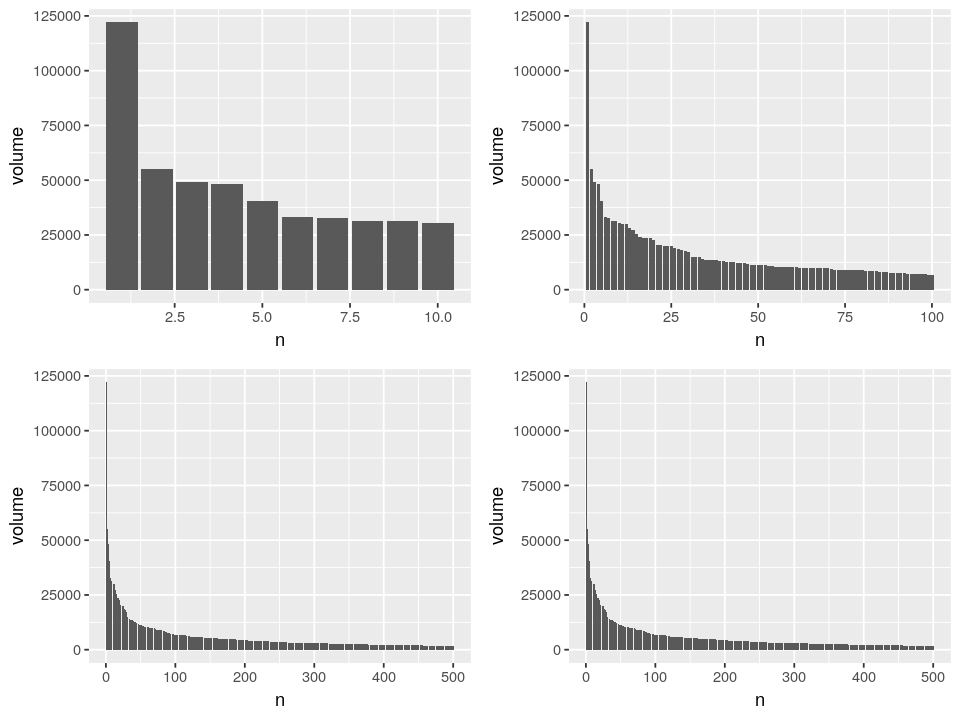

In [22]:
grid::grid.draw(top_grid_2)

In [23]:
cum_10_volume <- incidents %>%
    select(-narrative) %>%
    arrange(desc(volume)) %>%
    top_n(10, volume) %>%
    mutate(n = 1:n(), 
           volume = cumsum(volume)) %>%
    ggplot(aes(n, volume)) +
        geom_col() +
        scale_x_continuous(breaks = 1:10) +
        labs(x = NULL, y = NULL)

cum_100_volume <- incidents %>%
    select(-narrative) %>%
    arrange(desc(volume)) %>%
    top_n(100, volume) %>%
    mutate(n = 1:n(), 
           volume = cumsum(volume)) %>%
    ggplot(aes(n, volume)) +
        geom_col() +
        labs(x = NULL, y = NULL)

cum_500_volume <- incidents %>%
    select(-narrative) %>%
    arrange(desc(volume)) %>%
    top_n(1000, volume) %>%
    mutate(n = 1:n(), 
           volume = cumsum(volume)) %>%
    ggplot(aes(n, volume)) +
        geom_col() +
        labs(x = NULL, y = NULL)

cum_1000_volume <- incidents %>%
    select(-narrative) %>%
    arrange(desc(volume)) %>%
    top_n(10000, volume) %>%
    mutate(n = 1:n(), 
           volume = cumsum(volume)) %>%
    ggplot(aes(n, volume)) +
        geom_col() +
        labs(x = NULL, y = NULL)

cum_grid <- arrangeGrob(cum_10_volume, cum_100_volume, cum_500_volume, cum_1000_volume, ncol=2, 
                        left = "Cumulative volume of commodity spilled (in barrels)", 
                        bottom = "Oil spills (from largest to smallest)", 
                        top = "Cumulative spill volume of largest pipeline spills")

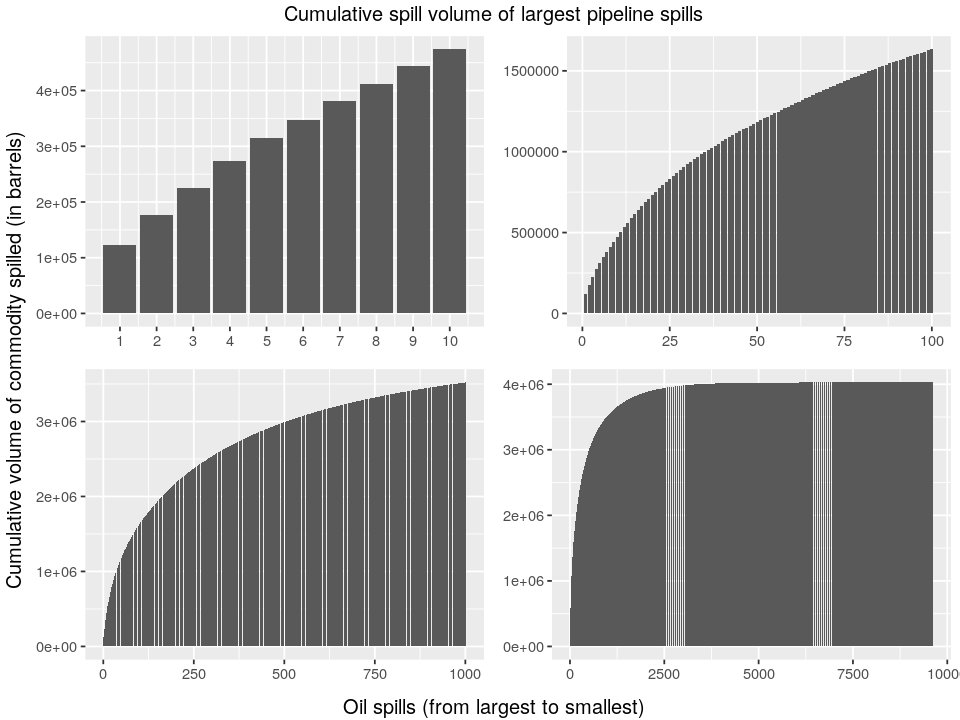

In [24]:
grid::grid.draw(cum_grid)

In [25]:
ggsave("../../drafts/entry_2020-04-03/figures/cumulative_spill_volume.jpg", cum_grid)

Saving 6.67 x 6.67 in image

